# Data Sampling

## Import Packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from random import sample

## Read Data

In [4]:
df_interactions_final_merged = pd.read_csv('df_interactions_final_merged.csv')

<Axes: xlabel='review_text_incomplete'>

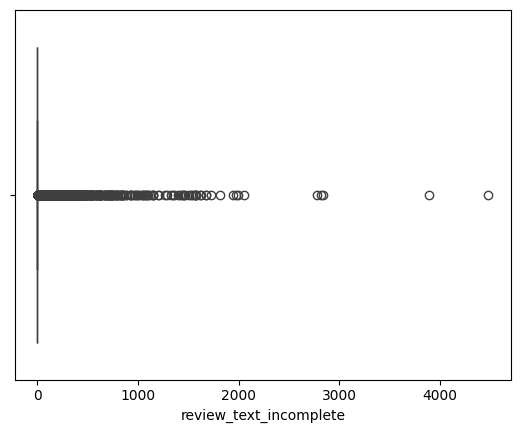

In [6]:
sns.boxplot(x='review_text_incomplete', data=df)

In [9]:
# Drop interactions without review texts
filtered_df = df_interactions_final_merged[df_interactions_final_merged['review_text_incomplete'].notna()]
user_review_counts = filtered_df.groupby('user_id').size().reset_index(name='review_count')
user_review_counts_sorted = user_review_counts.sort_values(by='review_count', ascending=False)
print(user_review_counts_sorted['review_count'].describe())

count    91715.000000
mean         7.835163
std         50.673327
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4483.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

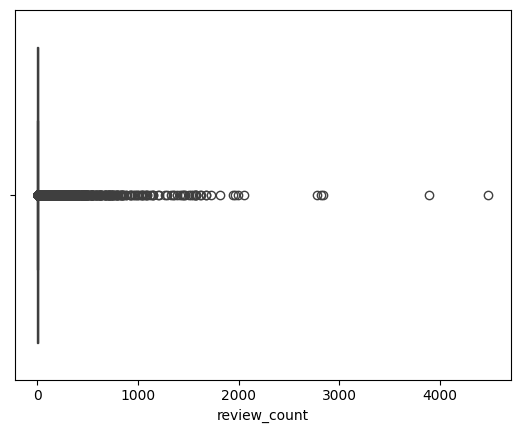

In [48]:
sns.boxplot(x='review_count', data=user_review_counts_sorted)

In [50]:
users_under_10 = user_review_counts_sorted[user_review_counts_sorted['review_count'] < 10]

In [56]:
sampled_users_df = users_under_10.sample(frac=0.5, random_state=42)
sampled_users_df.head()

,user_id,review_count
56689,9df22d72b0364e31d195558a043d5380,2
1044,02e297f0744d18df4e91baf2decf1435,2
40209,6ff12976180d26b41d3ef3af5c28571f,2
12123,21997b650d655b6397caa9e30eadd2d3,1
83385,e8e21a567325a9ccf07b5d39c23e1160,1


In [52]:
print(sampled_users_df['review_count'].describe())

count    40635.000000
mean         2.170346
std          1.838999
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          9.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

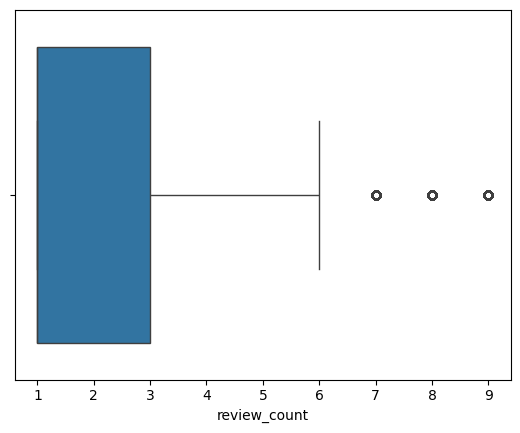

In [53]:
sns.boxplot(x='review_count', data=sampled_users_df)

In [61]:
sampled_interactions_df = df_interactions_final_merged[df_interactions_final_merged['user_id'].isin(sampled_users_df['user_id'])]
print(sampled_interactions_df.shape)
sampled_interactions_df.head()

(861669, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
100,fe0df2eff573e75c036eb8287c6b012a,24000713,706944b8c09f437fe4d8ec825d7d6631,5,NaN,2015-09-18 18:54:18+00:00,NaN,3308,NaN,0.574139
101,fe0df2eff573e75c036eb8287c6b012a,17381987,2eea8fef796c18d542e673684ea67049,5,Fantastic !<br />,2015-09-11 17:15:35+00:00,0.0,3315,fantastic br,0.598300
161,afc070543f19028dc7e7f084a0079f72,24300,abdad7525604ae79bd6f4b7f06ee5ca8,0,NaN,2017-10-23 17:49:18+00:00,NaN,2542,NaN,0.406046
162,afc070543f19028dc7e7f084a0079f72,16054808,296f2c13ae025ebeace5723322f361a1,0,NaN,2017-10-20 00:14:15+00:00,NaN,2546,NaN,0.406046
163,afc070543f19028dc7e7f084a0079f72,25311520,36567650cbe4e3a224e19a84f853fe21,5,Wonderful middle grades story.,2017-09-07 02:34:44+00:00,1.0,2589,wonderful middle grade story,0.571900


## Export Sampled Interactions Data to CSV